mean_squared_error: 41.92%


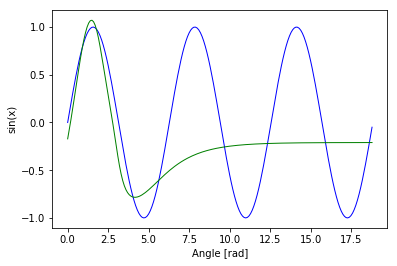

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pylab as plt

# Create dataset
x = np.arange(0, np.pi * 6, 0.1)
y = np.sin(x)

# Some parameters
ACTIVE_FUN = 'tanh'
BATCH_SIZE = 1
VERBOSE=0

# Create the model
model = Sequential()
model.add(Dense(5, input_shape=(1,), activation=ACTIVE_FUN))
model.add(Dense(5, activation=ACTIVE_FUN))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])

# Fit the model
model.fit(x, y, epochs=1000, batch_size=BATCH_SIZE, verbose=VERBOSE)

# Evaluate the model
scores = model.evaluate(x, y, verbose=VERBOSE)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

# Make predictions
y_pred = model.predict(x)

# Plot
plt.plot(x, y, color='blue', linewidth=1, markersize='1')
plt.plot(x, y_pred, color='green', linewidth=1, markersize='1')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

mean_squared_error: 35.41%


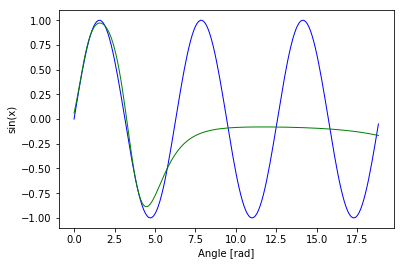

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pylab as plt

# Create dataset
x1 = np.arange(0, np.pi * 6, 0.1)
y1 = np.sin(x)

# Some parameters
ACTIVE_FUN = 'tanh'
BATCH_SIZE = 1
VERBOSE=0

# Create the model
model = Sequential()
model.add(Dense(5, input_shape=(1,), activation=ACTIVE_FUN))
model.add(Dense(5, activation=ACTIVE_FUN))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])

# Fit the model
model.fit(x1, y1, epochs=1000, batch_size=BATCH_SIZE, verbose=VERBOSE)

# Evaluate the model
scores = model.evaluate(x1, y1, verbose=VERBOSE)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

# Make predictions
y_pred = model.predict(x)

# Plot
plt.plot(x1, y1, color='blue', linewidth=1, markersize='1')
plt.plot(x1, y_pred, color='green', linewidth=1, markersize='1')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [ ]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import math

x2 = np.arange(0, math.pi*6, .1)
y2 = (np.sin(x)+1)/2 

model = Sequential([
    Dense(10, input_shape=(1,), activation='sigmoid'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_squared_error'])
model.fit(x2, y2, epochs=100000, batch_size=8, verbose=0)

preds = model.predict(x2)

plt.plot(x2, y2, 'b', x, preds, 'r--')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()

x3 = np.arange(0, 100, .1)
y3 = (np.sin(x)+1)/2 

model_copy = model
model_copy.fit(x3, y3, epochs=10000, batch_size=8, verbose=0)
model_copy_preds = model_copy.predict(x3)

plt.plot(x2, y2, 'b', x3, model_copy_preds, 'r--')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import random
import numpy
from sklearn.preprocessing import MinMaxScaler

regressor = Sequential()
regressor.add(Dense(units=20, activation='relu', input_dim=1)) 
regressor.add(Dense(units=20, activation='relu')) 
regressor.add(Dense(units=20, activation='relu')) 
regressor.add(Dense(units=1))
regressor.compile(loss='mean_squared_error', optimizer='adam')

N = 50000
X4 = numpy.empty((N,))
Y4 = numpy.empty((N,))

for i in range(N):
    X4[i] = random.uniform(-10, 10)
X4 = numpy.sort(X4).reshape(-1, 1)

for i in range(N):
    Y4[i] = numpy.sin(X4[i])
Y4 = Y4.reshape(-1, 1)

X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X4 = X_scaler.fit_transform(X4)
Y4 = Y_scaler.fit_transform(Y4)

regressor.fit(X4, Y4, epochs=100, verbose=0, batch_size=32)
#regressor.fit(X, Y.reshape(5000,))

x5 = numpy.mgrid[-10:10:100*1j]
x5 = x5.reshape(-1, 1)
y5 = numpy.mgrid[-10:10:100*1j]
y5 = y5.reshape(-1, 1)
x5 = X_scaler.fit_transform(x)

for i in range(len(x5)):
    y5[i] = regressor.predict(numpy.array([x5[i]]))

plt.figure()
plt.plot(X_scaler.inverse_transform(x5), Y_scaler.inverse_transform(y5), '.')
plt.plot(X_scaler.inverse_transform(X4), Y_scaler.inverse_transform(Y4), '.')